In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

In [2]:
# MEASURING RISK VIA THE MEAN AND STANDARD DEVIATION
# As FinTech professionals, we need a quantitative way to measure risk that goes well with our hunches.
# In this section, you'll explore two key metrics that we often use together to quantify investment risk:
    # 1. The Mean
    # 2. The Standard Deviation

In [3]:
# MEASURE RISK VIA THE MEAN
# One metric we use to quantify risk is the mean, or the average value, of a stock or portfolio over time.
# The mean serves as a baseline for the performance of an asset over a particular time period.
# Once a baseline is established, we can measure how a stock performs relative to that baseline.
# For example, we consider an asset with dramatic daily fluctuations from the mean riskier than one with consistent, smaller movements.
# Assume that we want to calculate the mean of a Series, or column, of numbers:
    # 1. First step is to sum up the values in the Series
    # 2. Then we divide the sum of the Series by the count, or the number of elements in the Series.
    
# Calculating the mean using `sum` and `count`
stock_abc = pd.DataFrame({'close': [11.25, 11.98, 10.74, 11.16, 12.35, 12.87, 13.03]})
stock_abc_mean_1 = stock_abc['close'].sum() / stock_abc['close'].count()

# Review the results
display(stock_abc_mean_1)

# Conversely, and more simply, you can use the `mean()` function to execute the same calculation
stock_abc_mean_2 = stock_abc.mean()

# Review the results
display(stock_abc_mean_2)

11.911428571428571

close    11.911429
dtype: float64

In [4]:
# As you can see, there are multiple ways to get to the same answer, but the `mean()` function is a more efficient way.
# We consider the mean to be a MEASURE OF CENTRAL TENDENCY, or a central value for a distribution (or Series) of values.
# This is a key value for assessing the risk of an asset.

In [5]:
# MEASURE RISK VIA THE STANDARD DEVIATION
# Another metric that we use to quantify risk is the STANDARD DEVIATION.
# STANDARD DEVIATION measures the volatility of an asset's price compared to its historical mean over a particular period of time.
# A small standard deviation indicates that the daily return values of the asset don't move far from the average.
# A large standard deviation indicates that the asset is quite volatile, fluctuating a lot in thedaily return values.
# Assets values existing +/-1 standard deviation of the mean are not considered volatile.
# Stocks with larger standard deviations tend to have daily return values that exist far from the mean.
# These values are called OUTLIERS, as they exist outside of the usual range of values.
# The standard deviation is of prime importance in finanace. For more info: https://www.investopedia.com/terms/s/standarddeviation.asp

In [6]:
# CALCULATING THE STANADARD DEVIATION
# We use the standard deviation to measure the volatility of an asset's price relative to its historical mean price.
# It's a fundamental measurement for the quantitative analysis of a financial asset.
# As an example, we'll calculate the Standard Deviation for some tech stock data.
# The standard in the finance industry is to calculate the standard deviation by using daily return.
# In contrast to analyzing information for stocks with wildly different prices, using daily return data makes it easier to compare information across assets.
# To calculate the daily return, we use the `pct_change()` function as we have.

In [7]:
# Create a tech_stocks DataFrame using the the tech_stocks_closing_value_2018.csv file:
tech_stocks_df = pd.read_csv(
    Path('tech_stocks_closing_value_2018.csv'),
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
)

# Review the beginning and end of the DataFrame:
display(tech_stocks_df.head())
display(tech_stocks_df.tail())

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-01-02,168.339050,84.128128,1065.000000,181.419998,1189.010010
2018-01-03,168.309738,84.519646,1082.479980,184.669998,1204.199951
2018-01-04,169.091522,85.263542,1086.400024,184.330002,1209.589966
2018-01-05,171.016678,86.320648,1102.229980,186.850006,1229.140015
2018-01-08,170.381485,86.408737,1106.939941,188.279999,1246.869995


,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-12-24,145.642090,93.729706,976.219971,124.059998,1343.959961
2018-12-26,155.898438,100.132362,1039.459961,134.179993,1470.900024
2018-12-27,154.886688,100.749725,1043.880005,134.520004,1461.640015
2018-12-28,154.966034,99.963089,1037.079956,133.199997,1478.020020
2018-12-31,156.463837,101.138069,1035.609985,131.089996,1501.969971


In [8]:
# Using the `pct_change()` function, create a `daily_returns` DataFrame to calculate the daily returns:
daily_returns = tech_stocks_df.pct_change().dropna()

# Review the DataFrame:
daily_returns.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-01-03,-0.000174,0.004654,0.016413,0.017914,0.012775
2018-01-04,0.004645,0.008801,0.003621,-0.001841,0.004476
2018-01-05,0.011385,0.012398,0.014571,0.013671,0.016163
2018-01-08,-0.003714,0.001020,0.004273,0.007653,0.014425
2018-01-09,-0.000115,-0.000680,-0.000614,-0.002178,0.004676


In [9]:
# Now we can calculate the standard deviation by using the `std()` function.
    # Behind the scenes this function calculates the mean return
    # It then evaluates how far from the mean each daily return data point it:
    
# Calculate the standard deviation of each of the tech stocks using the `std()` function:
standard_deviation = daily_returns.std()

# Review the results
display(standard_deviation.head())

AAPL    0.018106
MSFT    0.017839
GOOG    0.017724
FB      0.023949
AMZN    0.022768
dtype: float64

In [10]:
# Next, we'll sort this output in ascending order by using the `sort_values` function.
# This orders the assets from smallest amount of risk to the largest:
standard_deviation_sorted = standard_deviation.sort_values()

# Display the results
standard_deviation_sorted

GOOG    0.017724
MSFT    0.017839
AAPL    0.018106
AMZN    0.022768
FB      0.023949
dtype: float64

In [11]:
# SKILL DRILL
# Create the `stocks` DataFrame
stocks = pd.DataFrame({
    'stock_abc' : [17.89, 16.43, 16.25, 15.74, 15.36, 18.29, 18.00, 18.15, 18.30, 18.50],
    'stock_def' : [124.37, 125.21, 125.75, 126.51, 127.25, 127.00, 127.10, 126.89, 126.99, 127.75],
    'stock_efg' : [5.45, 5.50, 5.75, 5.10, 4.90, 4.75, 4.70, 4.80, 4.29, 4.33]
})
stocks.head()

,stock_abc,stock_def,stock_efg
0,17.89,124.37,5.45
1,16.43,125.21,5.50
2,16.25,125.75,5.75
3,15.74,126.51,5.10
4,15.36,127.25,4.90


In [12]:
# Create a `stocks_daily_returns` DataFrame using the `pct_change` function.
# Be sure to `dropna`:
stocks_daily_returns = stocks.pct_change().dropna()

# Review the DataFrame
stocks_daily_returns.head()

,stock_abc,stock_def,stock_efg
1,-0.081610,0.006754,0.009174
2,-0.010956,0.004313,0.045455
3,-0.031385,0.006044,-0.113043
4,-0.024142,0.005849,-0.039216
5,0.190755,-0.001965,-0.030612


In [13]:
# Using the `stocks_daily_returns` DataFrame, determine the mean of the values:
stocks_daily_returns.mean()

stock_abc    0.006037
stock_def    0.002989
stock_efg   -0.023824
dtype: float64

In [14]:
# Use the `std()` and `sort_values()` functions to determine the standard deviation from least to greatest:
stocks_std = stocks_daily_returns.std().sort_values()

# Review the DataFrame:
stocks_std

stock_def    0.003503
stock_efg    0.055040
stock_abc    0.074930
dtype: float64

In [15]:
# EVALUATE THE STANDARD DEVIATION
# By inspecting the five values from the `tech_stocks` DataFrame, you can observe that FB has the largest standard deviation.
# This means that Facebook (Meta) is the most volatile and risky, because it deviates the most from its average return.
# By contrast, Google has the smallest standard deviation, which indicates it's the least risky.
# Let's say you want to compare these values to the standard deviations of non-tech stocks or to the market as a whole.
# Before doing that, we need to dig a bit more deeply.
# Generally, we measure the standard deviation for three key time periods: daily, monthly, annually.
# We do this by calculating daily returns, monthly returns, and an annualized standard deviation, respecitvely.
# Financial publications such as the Wall Street Journal, often report the annualized standard deviation.
# Particularly because it offers the greatest insight into the long-term volatility trends for an asset.
# This makes annualized standard deviation the most relevant for financial analysts building portfolios.

In [16]:
# FIND THE ANNUALIZED STANDARD DEVIATION
# We'll calculate the annualized standard deviation (std) by using the daily returns we generated from the tech_stocks DataFrame.
# To do this, we need to mulitply the square root of the number of trading days in a year by the standard deviation.
# Additionally, we'll use the NumPy `sqrt` function:
annualized_standard_deviation = standard_deviation * np.sqrt(252)

# Review the results:
annualized_standard_deviation.sort_values()

GOOG    0.281354
MSFT    0.283180
AAPL    0.287428
AMZN    0.361434
FB      0.380172
dtype: float64

In [17]:
# Notice that the annualized standard deviations have changed compared to the calculated standard deviations.
# However, the order of the stocks from lowest to highest risk has stayed the same.
# Regardless of the time frame, the less risky stocks have a smaller value than the riskier stocks.
# Just be sure that you're using the same time frame to evaluate all the stocks.

In [18]:
# SKILL DRILL
# Determine the annualized standard deviation of `stocks_std`:
annualized_stocks_std = stocks_std * np.sqrt(252)

# Review the results:
annualized_stocks_std.sort_values()

stock_def    0.055613
stock_efg    0.873733
stock_abc    1.189478
dtype: float64

<AxesSubplot:title={'center':'Box Plot of Daily Returns Data - 5 Tech Stocks'}>

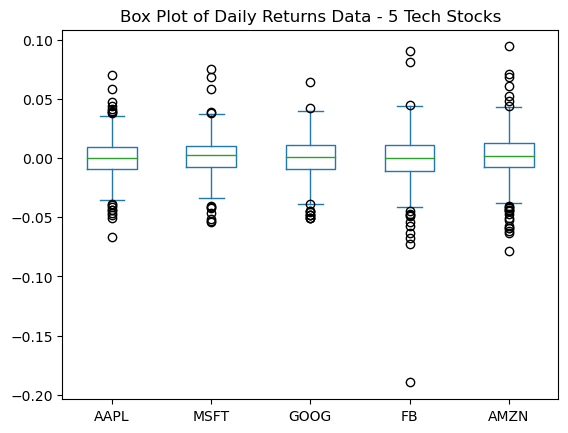

In [19]:
# VISUALIZE THE STANDARD DEVIATION VIA BOX PLOTS
# One of the primary visualizations that we use with measures of standard deviationis the Pandas box plots.
# The box plot has become the standard for displaying standard deviation, it illustrates the total spread of the data.
# That is, it shows the mean value, the 50% of data that's clustered around the mean, and the outliers.

# Plot the box plot:
daily_returns.plot.box(title='Box Plot of Daily Returns Data - 5 Tech Stocks')

In [20]:
# Let's break down the plot:
    # The horizonal green line in the middle of each box is the mean value of the data.\
    # Each box represents 50% of the data points clustered around the mean.
        # This area is referred to as the INTERQUARTILE RANGE. The longer the box, the more spread out the 50% is.
        # A longer box indicates greater volatility in the daily returns data.
    # The vertical lines are the whiskers, which represent the range, or spread, of the data.
        # Longer whiskers indicate greater volatility in the data.
    # Any data points that extend beyond the whiskers are the outliers, which also indicate volatility and risk.
# A box plot that displays a long box, long whiskers, and several outliers are high risk, and volatile assets.    

In [ ]:
# Based on this plot, it appears that the daily return data for GOOG is the least volatile.
# The GOOG box plot has the least number of outilers, and the whiskers seem to be among the shortest.
# This makes sense, because GOOG has the smallest standart deviation, which is another measure of volatility.
# Additionally, FB & AMZN are in close contention for the most volatile.
# They both seem to have longer whiskers with several outliers.
# If you notice that one FB outlier way down at the bottom of the plot, that data point is probably what won FB the title of most volatile of the five stocks.
# As you study these plots, remember that the greater the spread, the greater the risk.
# The greater the risk, the greater the potential for outsized earnings or outsized losses. (But outsized losses get more attention.)
# With annualized standard deviation metrics and box plots, quantitative financial analysts can determine the potential risk that's associated with an assets.
# Either stocks with large annualized standard deviations or box plots with large boxes and long whiskers can keep a portfolio manager up at night.
# However, risk isn't always about the possibility of losing money when a stock price declines or, worse, collapses.
# High-risk stocks can also lead to big gains.
# Therefore, we should evaluate risk in terms of an asset's potential ROI.
# The Sharpe ratio, is a metric that allows us to account for both risk and return in work.